This file extracts features just using the pretrained model.

# Feature Extraction

In [105]:
import os
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
from sklearn.model_selection import train_test_split
import dataset



In [195]:
def visualize_images(images, png=True):
    # Give this function any number of images or depth maps
    # and it will display them in a grid.

    if not png:
        images = [np.transpose(img, (1, 2, 0)) for img in images]
    n = len(images)
    # Calculate number of rows and columns
    width = math.ceil(math.sqrt(n))
    height = math.ceil(n / width)
    plt.figure(figsize=(17.5, 5))
    fig, axes = plt.subplots(height, width)
    plt.subplots_adjust(wspace=0, hspace=0)
    if n == 1:
        axes.imshow(images[0])
        axes.axis('off')
        return
    for i, ax in enumerate(axes.flatten()):
        if(i<n): 
            # Display image
            image = images[i]

            #Scale pixel values from 0-1 to 0-255 if necessary
            if not png:
                image = (image * 255)
            
            ax.imshow(image)
            ax.axis('off')
        else:
            # Hide axis if no image
            ax.axis('off')
    fig.set_size_inches(17.454545*width, 5*height)
    plt.show()

def visualize_losses(losses):
    plt.figure(figsize=(10, 5))
    plt.plot(losses, marker='o', linestyle='-')
    plt.title('Training Loss')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

def load_image(file_path):
    return Image.open(file_path)

def load_depth(file_path):
    return Image.open(file_path)

class MinMaxNormalize(object):
    def __call__(self, tensor):
        return (tensor - tensor.min()) / (tensor.max() - tensor.min())
    
class DivBy255(object):
    def __call__(self, tensor):
        return tensor / 255

<Figure size 1750x500 with 0 Axes>

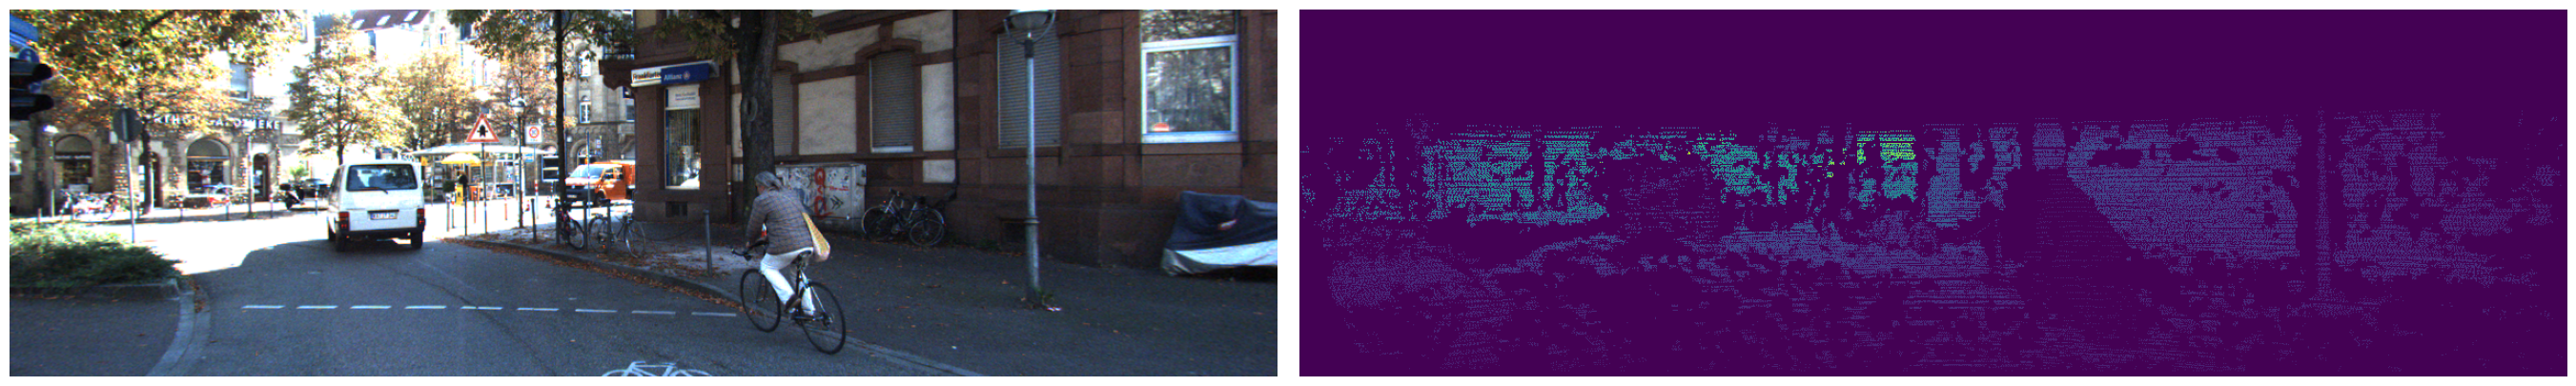

In [196]:
# Set Directories
base_dir = 'dataset'
image_dir = os.path.join(base_dir, 'image')
depth_dir = os.path.join(base_dir, 'groundtruth_depth')

image_files = sorted([os.path.join(image_dir, file) for file in os.listdir(image_dir)])
depth_files = sorted([os.path.join(depth_dir, file) for file in os.listdir(depth_dir)])

# Ensure that the lists are aligned and have the same length
assert len(image_files) == len(depth_files), "The number of images and depth maps should be the same"

# Load the data into variables
images = [load_image(file) for file in image_files]
depth_maps = [load_depth(file) for file in depth_files]
data = list(zip(images, depth_maps))

# Visualize a sample from the dataset
visualize_images([images[30], depth_maps[30]])

In [197]:
def display_two_images(image1, image2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with two subplots
    
    # Display the first image on the left subplot
    axes[0].imshow(image1)
    # axes[0].set_title('Image 1')
    
    # Display the second image on the right subplot
    axes[1].imshow(image2)
    # axes[1].set_title('Image 2')
    
    # Hide axis ticks and labels for better visualization
    for ax in axes:
        ax.axis('off')
    
    plt.show()

<Figure size 1750x500 with 0 Axes>

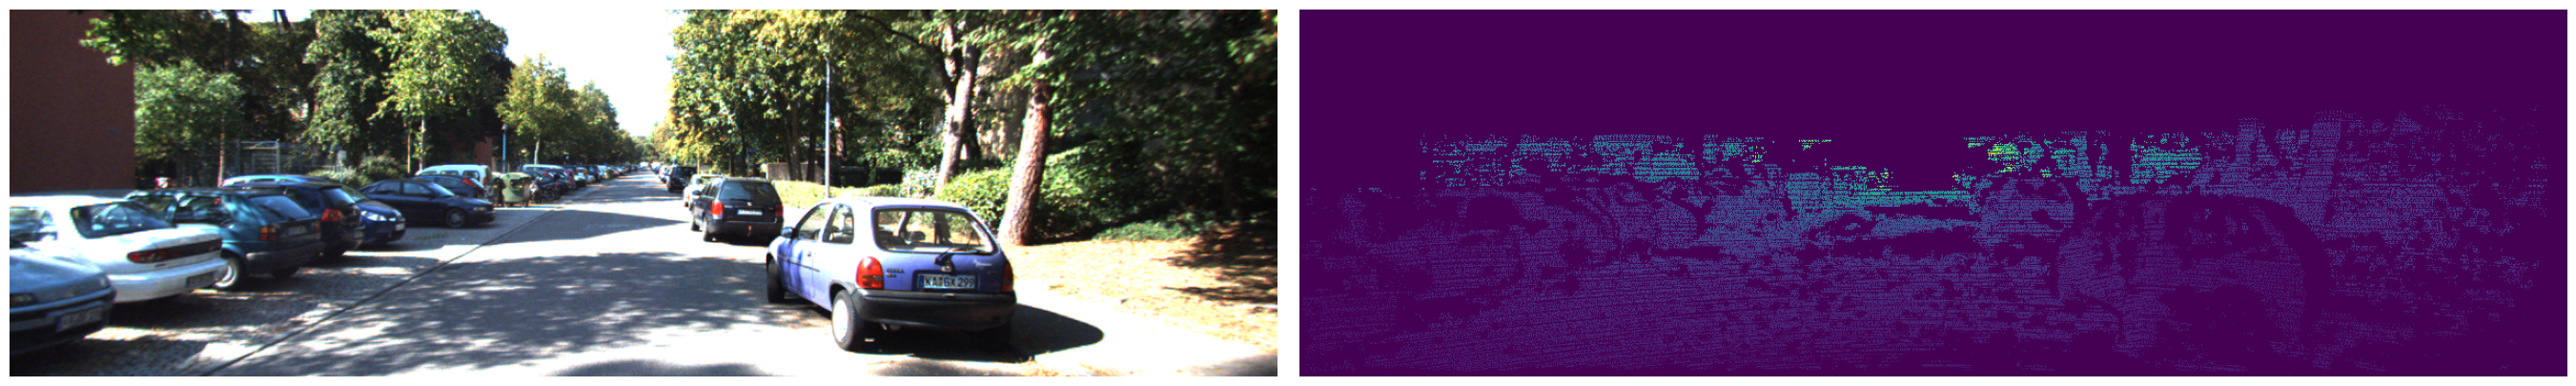

<Figure size 1750x500 with 0 Axes>

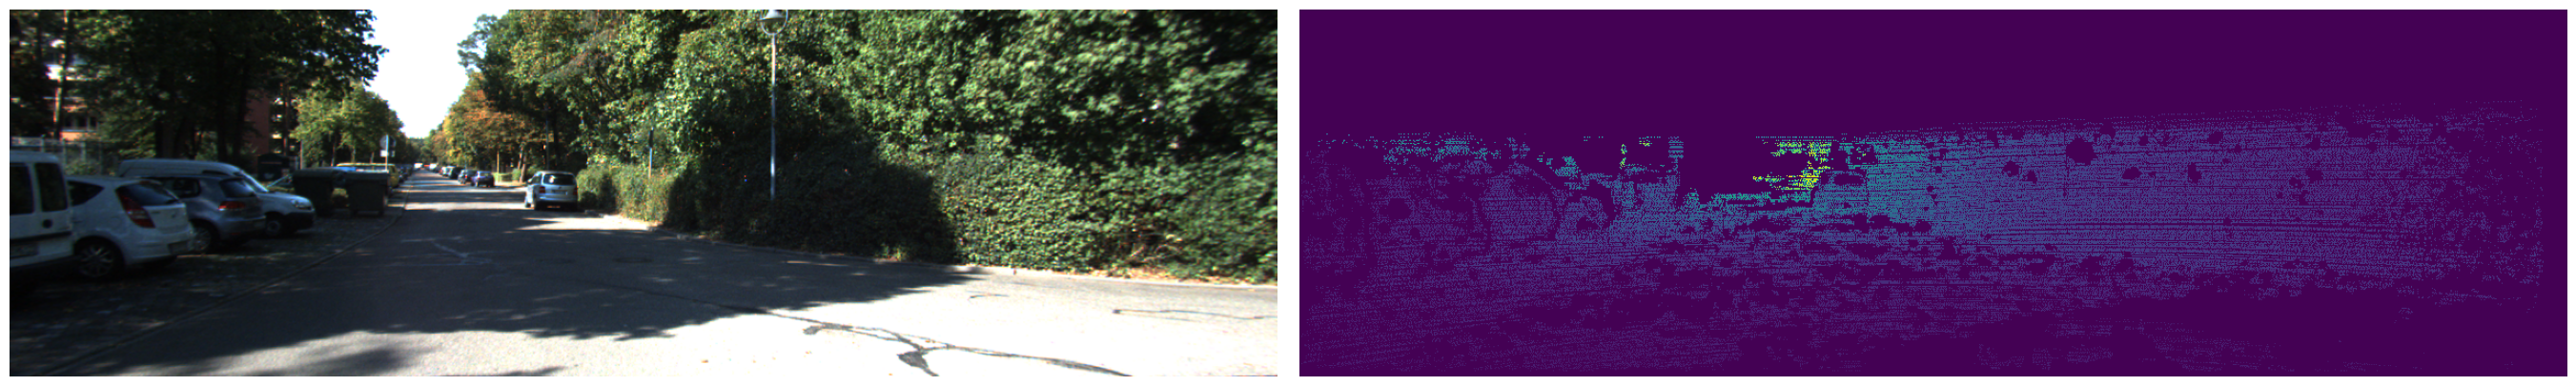

<Figure size 1750x500 with 0 Axes>

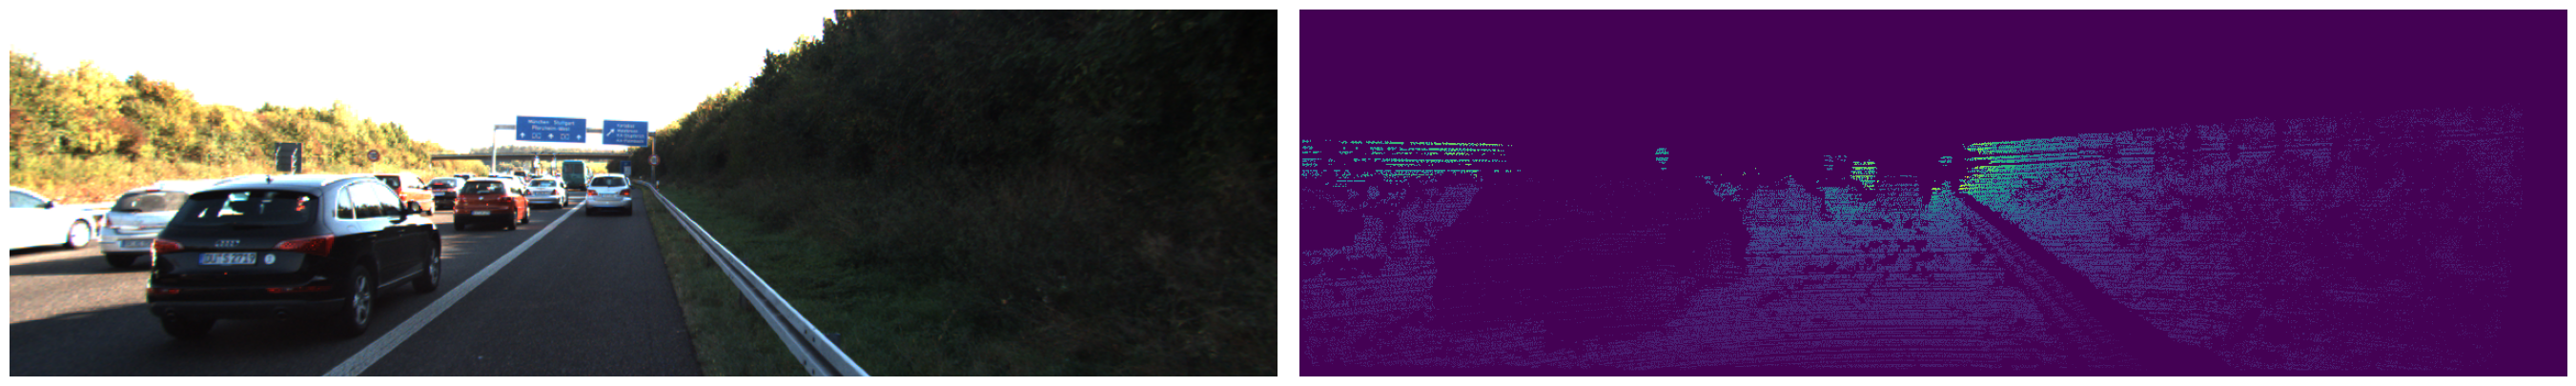

In [198]:
# define image transformation
transform = transforms.Compose([
    transforms.Resize((352, 1216)),
    transforms.ToTensor(),
    DivBy255()
])

train, test = train_test_split(data, test_size=0.20, random_state=42)
train, val = train_test_split(train, test_size=0.15, random_state=42)

train_dataset = dataset.DepthDataset(train, transform)
val_dataset = dataset.DepthDataset(val, transform)
test_dataset = dataset.DepthDataset(test, transform)

batch_size = 8
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# dataiter = iter(trainloader)
# images_batch1, labels_batch1 = next(dataiter)

# # Print the first two examples
# image1 = np.transpose(images_batch1[0], (1, 2, 0))
# image2 = np.transpose(labels_batch1[0], (1, 2, 0))
# visualize_images([image1, image2], png=False)

# Print the first two train, val, and test examples
dataiter = iter(trainloader)
images_batch1, labels_batch1 = next(dataiter)
visualize_images([images_batch1[0], labels_batch1[0]], png=False)
dataiter = iter(valloader)
images_batch1, labels_batch1 = next(dataiter)
visualize_images([images_batch1[0], labels_batch1[0]], png=False)
dataiter = iter(testloader)
images_batch1, labels_batch1 = next(dataiter)
visualize_images([images_batch1[0], labels_batch1[0]], png=False)


In [153]:
#def load_model(removed_layers = 1):
#    # Load Pre-Trained Model
#    model = models.resnet18(pretrained=True)
#    #model = model.to("cpu")
#    #remove final connected layers from model
#    #model.fc = nn.Identity()
#    model = torch.nn.Sequential(*list(model.children())[:-removed_layers])
#    return model
## Function to extract features
#def extract_features(dataloader, model = load_model(1)):
#    features = []
#    with torch.no_grad(): #Disables gradient calcullation
#        for inputs, _ in dataloader:
#            outputs = model(inputs)
#            features.append(outputs.flatten(1))
#    return torch.cat(features)
#features = extract_features(trainloader, load_model(1))
#features.shape

C:\Users\20neu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\20neu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([680, 512])

In [111]:
#Dimension Reduction with LLE
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
def LLE(data, n_components, n_neighbors):
    lle = LocallyLinearEmbedding(n_components = n_components, n_neighbors = n_neighbors, method='standard')
    return lle.fit_transform(data)

In [154]:
#features_lle = LLE(features, 150, 25)
#features_lle.shape

(680, 150)

In [273]:
import torch
import torch.nn.functional as F
#Critereon that ignores target values of 0
class MaskedL1Loss(torch.nn.Module):
    def __init__(self):
        super(MaskedL1Loss, self).__init__()

    def forward(self, output, target):
        # Create a mask that is 1 where the target is not 0 and 0 elsewhere
        mask = (target != 0).type(torch.float32)

        # Calculate the L1 loss for each element without reduction
        loss = F.l1_loss(output, target, reduction='none')

        # Apply the mask to exclude the loss from zero pixels
        masked_loss = loss * mask

        return masked_loss.sum() / mask.sum()

In [303]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

class DenseNetAutoencoder(nn.Module):
    def __init__(self, remove=2, pretrained=True):
        super(DenseNetAutoencoder, self).__init__()

        # Load pre-trained DenseNet-121 model
        densenet = models.densenet121(pretrained=pretrained)

        # Extract layers up to the final convolutional layer (before the fully connected layers)
        self.encoder = nn.Sequential(*list(densenet.features.children())[:-remove])

        # Decoder layers: Upsampling and convolutional layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1),  # UP1
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),   # UP2
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 3, kernel_size=4, stride=2, padding=1),     # UP3
            nn.Sigmoid()  # Sigmoid activation for pixel values between 0 and 1
        )

    def forward(self, x):
        print(f"Shape of input: {x.shape}")
        features = self.encoder(x)
        print(f"Shape of features: {features.shape}")
        #features_lle = LLE(features, 150, 25)
        #print(f"Shape of reduced features: {features_lle.shape}")
        output = self.decoder(features)
        print(f"Shape of output: {output.shape}")
        return output

class ResNet18Autoencoder(nn.Module):
    def __init__(self, remove=2, pretrained=True):
        super(ResNet18Autoencoder, self).__init__()
        
        # Load pre-trained ResNet-18 model
        resnet = models.resnet18(weights=pretrained)
        
        # Extract layers up to the final convolutional layer (before the fully connected layers)
        self.encoder = nn.Sequential(*list(resnet.children())[:-remove])

        self.conv_layers = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            #nn.Conv2d(128, 128, kernel_size=3, padding=1),
            #nn.ReLU(),
            #nn.Conv2d(128, 64, kernel_size=3, padding=1),
            #nn.ReLU(),
        )

        # Decoder layers: Upsampling and convolutional layers
        self.decoder = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),  # 2x2 bilinear upsampling
            nn.ConvTranspose2d(64, 1, kernel_size=1, stride=1, padding=0),
            nn.ReLU(),
            # nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),  # Upsample
            # nn.ReLU(inplace=True),
            # nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),   # Upsample
            # nn.ReLU(inplace=True),
            # nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),     # Upsample
            #nn.Sigmoid()  # Sigmoid activation for pixel values between 0 and 1
        )

    def forward(self, x):
        #print(f"Shape of input: {x.shape}")
        x = self.encoder(x)
        #print(f"Shape of encoder output: {x.shape}")
        x = self.conv_layers(x)
        #print(f"Shape of conv_layers output: {x.shape}")
        output = self.decoder(x)
        #print(f"Shape of output: {output.shape}")
        return output

min: 1.5019012689590454   max: 9.57870864868164


<Figure size 1750x500 with 0 Axes>

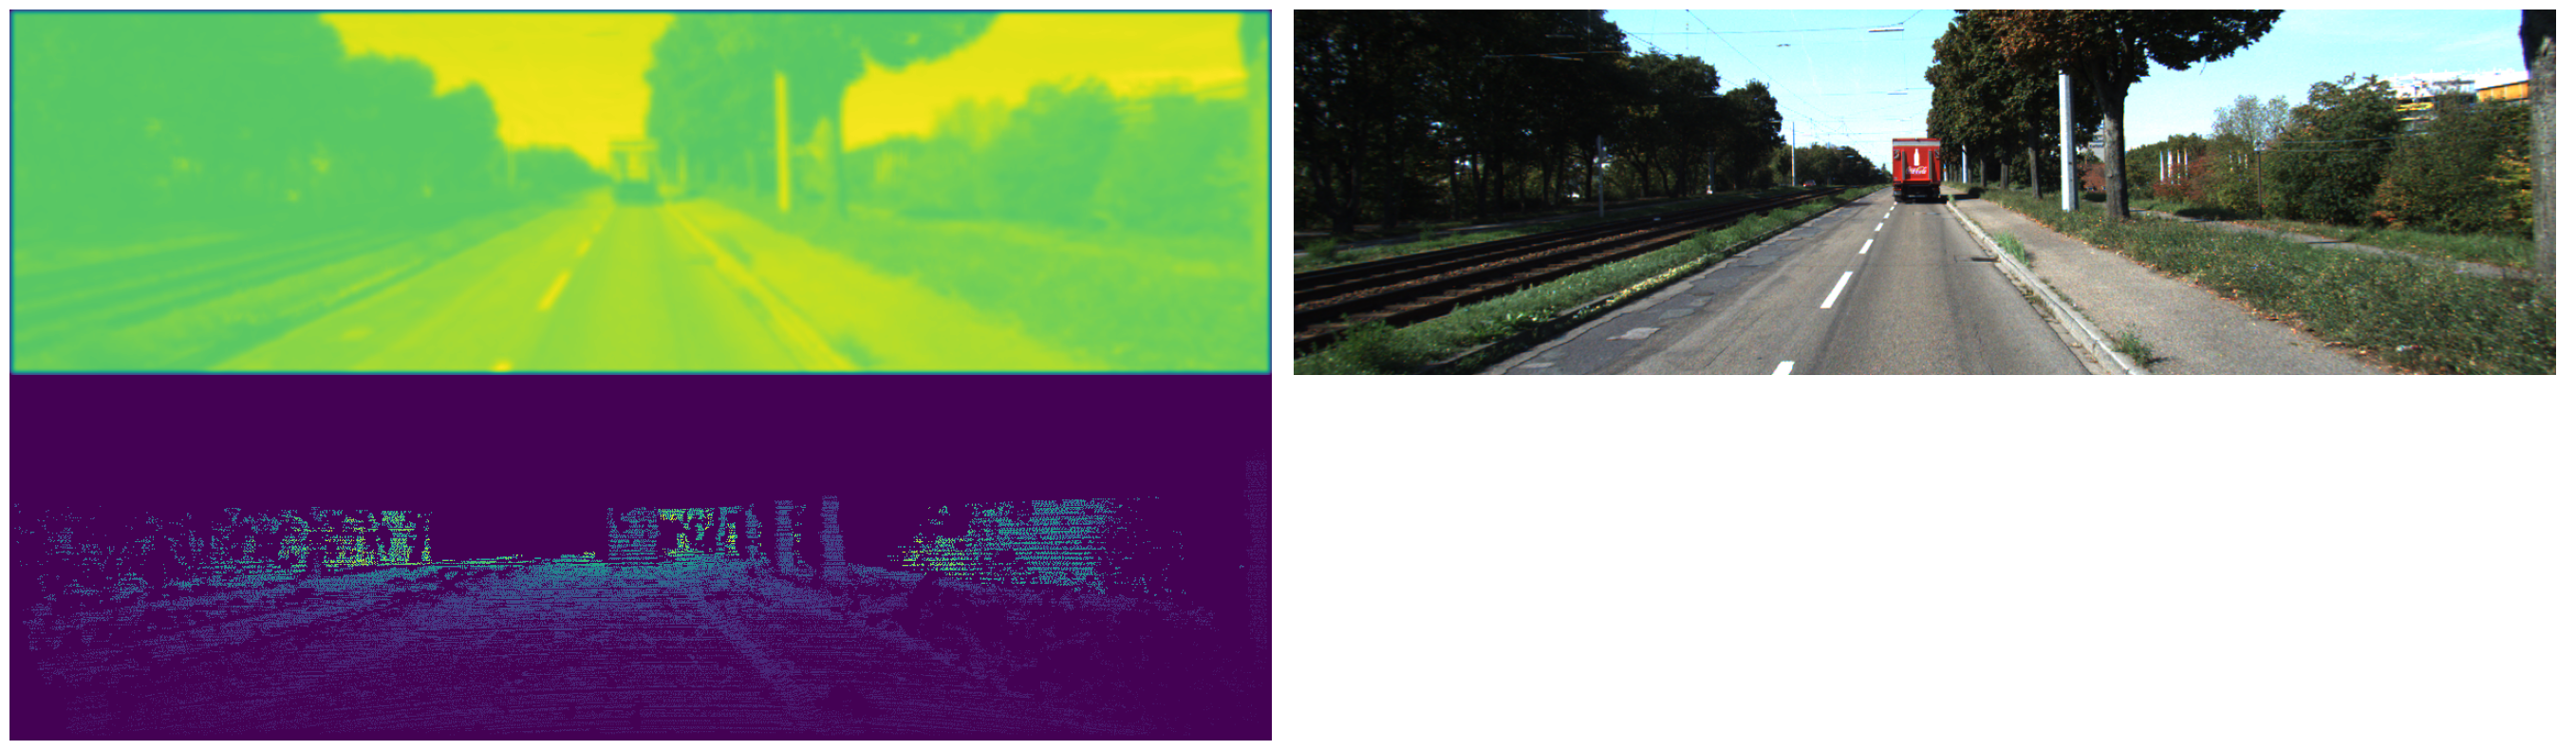

Epoch 10/10: 100%|██████████| 85/85 [03:02<00:00,  2.15s/it, loss=7.89]
C:\Users\20neu\AppData\Local\Temp\ipykernel_43024\2477556622.py:13: UserWarning: Using a target size (torch.Size([8, 3, 352, 1216])) that is different to the input size (torch.Size([8, 1, 352, 1216])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.l1_loss(output, target, reduction='none')


Validation Loss: 8.025243314107259


In [306]:
import torch.optim as optim
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
from IPython.display import clear_output
def train(model, train_loader, criterion, optimizer, epochs):
    model.to(device)
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        losses = []
        batch = 0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        for images, depth_maps in progress_bar:
            optimizer.zero_grad()
            pred_depth_maps = model(images.to(device))
            # print(f"Shape of depth map: {depth_maps.shape}")
            loss = criterion(pred_depth_maps, depth_maps)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            progress_bar.set_postfix({'loss': loss.item()})
            losses.append(loss.cpu().detach().numpy())
            if batch % 5 == 0:
                clear_output(wait=True)
                #visualize_images([images[0].cpu().detach().numpy(), pred_depth_maps[0].cpu().detach().numpy(), depth_maps[0]], png=False)
                print(f"min: {pred_depth_maps[0].min().item()}   max: {pred_depth_maps[0].max().item()}")
                visualize_images([pred_depth_maps[0].cpu().detach().numpy(),images[0], depth_maps[0]], png=False)
                #visualize_losses(losses)
            #print(f"\rloss: {loss.item()}", end="")
            scheduler.step()
            batch += 1
                

        #print(f"\rEpoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader)}")

def evaluate(model, val_loader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for images, _ in val_loader:
            outputs = model(images)
            loss = criterion(outputs, images)
            total_loss += loss.item()
    avg_loss = total_loss / len(val_loader)
    print(f"Validation Loss: {avg_loss}")

# # Usage example:
# model = DenseNetAutoencoder()
# input_tensor = torch.randn(1, 3, 480, 640)  # Example input shape (batch_size, channels, height, width)
# output = model(input_tensor)

# remove 8 layers to get a latent space that is half of the size of the input
autoencoder = ResNet18Autoencoder(remove=8, pretrained=True)

criterion = MaskedL1Loss()
#criterion = nn.L1Loss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.0001)
scheduler = StepLR(optimizer, step_size=20, gamma=0.2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train(autoencoder, trainloader, criterion, optimizer, epochs=10)
evaluate(autoencoder, valloader, criterion)
# TypeError: Invalid shape (352, 1216, 64) for image data

# Reduce Dimensionality with LLE
1 512
2 214016
3 428032